# 4) Customer categories

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np


relative_path = '/content/drive/My Drive/Customer Segmentation/Data/'
df_cleaned = pd.read_csv(relative_path + 'data_cleaned.csv', encoding='latin', dtype={'CustomerID': str}) 
X = pd.read_csv(relative_path + 'Matrix_X.csv') 

unique_products = df_cleaned['Description'].unique()
clusters_tmp = pd.read_csv(relative_path + 'Matrix_X_clusters.csv') 
clusters = clusters_tmp.to_numpy()[:,1]

In [ ]:
df_cleaned

,Unnamed: 0,Unnamed: 0.1,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
0,0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,15.30
1,1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34
2,2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,22.00
3,3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34
4,4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...
392852,401599,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,0,10.20
392853,401600,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,0,12.60
392854,401601,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,0,16.60
392855,401602,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,0,16.60


## 4.1) New feature

Add new feature: `categ_product` into `df_cleaned` dataframe. Use information, obtained in previous part: `clusters` and `unique_procudts`.

Use `map` and `zip` if you want.

In [ ]:
print(unique_products.shape)
print(clusters.shape)
corresp = dict()
for key, val in zip(unique_products, clusters):
    corresp[key] = val 

df_cleaned['categ_product'] = df_cleaned.loc[:, 'Description'].map(corresp)
#df_cleaned.head(5)

(3878,)
(3878,)


In [ ]:
df_cleaned

,Unnamed: 0,Unnamed: 0.1,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice,categ_product
0,0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,15.30,4
1,1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,2
2,2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,22.00,2
3,3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,2
4,4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,20.34,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
392852,401599,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,0,10.20,3
392853,401600,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,0,12.60,4
392854,401601,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,0,16.60,2
392855,401602,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,0,16.60,2


## 4.2) Money spend for categories
Add 5 new features with names `categ_0` to `categ_4` to `df_cleaned` dataset, which indicate the money spent on each product category.

In [ ]:
# add 5 variables - the money spent on each of the 5 categories
for i in range(5):
    col = 'categ_{}'.format(i)        
    df_temp = df_cleaned[df_cleaned['categ_product'] == i]
    price_temp = df_temp['TotalPrice']
    price_temp = price_temp.apply(lambda x:x if x > 0 else 0)
    df_cleaned.loc[:, col] = price_temp
    df_cleaned[col].fillna(0, inplace = True)

df_cleaned[['CustomerID', 'InvoiceNo', 'Description', 'categ_product', 'categ_0', 'categ_1', 'categ_2', 'categ_3','categ_4']][:5]
#df_cleaned

,CustomerID,InvoiceNo,Description,categ_product,categ_0,categ_1,categ_2,categ_3,categ_4
0,17850,536365,WHITE HANGING HEART T-LIGHT HOLDER,4,0.0,0.0,0.00,0.0,15.3
1,17850,536365,WHITE METAL LANTERN,2,0.0,0.0,20.34,0.0,0.0
2,17850,536365,CREAM CUPID HEARTS COAT HANGER,2,0.0,0.0,22.00,0.0,0.0
3,17850,536365,KNITTED UNION FLAG HOT WATER BOTTLE,2,0.0,0.0,20.34,0.0,0.0
4,17850,536365,RED WOOLLY HOTTIE WHITE HEART.,2,0.0,0.0,20.34,0.0,0.0


## 4.3) Basket price with categories

We then create a dataframe where each row is a purchase (unique `InvoiceNo`) with total amount of money, and the amount spent on each product category.
Read and understand the following code.

The features we have here are the following:
`CustomerID`, `InvoiceNo`, `Basket Price`, `categ_0` to `categ_4` and `InvoiceDate`


In [ ]:
# sum the commands for each order
temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['TotalPrice'].sum()
basket_price = temp.rename(columns = {'TotalPrice':'Basket Price'})
basket_price.head()

,CustomerID,InvoiceNo,Basket Price
0,12346,541431,0.00
1,12347,537626,711.79
2,12347,542237,475.39
3,12347,549222,636.25
4,12347,556201,382.52


In [ ]:
# percentage of the price of the order / product category
for i in range(5):
    col = 'categ_{}'.format(i) 
    temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)[col].sum()
    basket_price.loc[:, col] = temp

basket_price.head() 

,CustomerID,InvoiceNo,Basket Price,categ_0,categ_1,categ_2,categ_3,categ_4
0,12346,541431,0.00,0.0,0.00,0.00,0.00,0.00
1,12347,537626,711.79,187.2,124.44,293.35,23.40,83.40
2,12347,542237,475.39,130.5,38.25,169.20,84.34,53.10
3,12347,549222,636.25,330.9,38.25,115.00,81.00,71.10
4,12347,556201,382.52,74.4,19.90,168.76,41.40,78.06


In [ ]:
basket_price.shape

(18632, 8)

In [ ]:
# command date
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])
df_cleaned['InvoiceDate_int'] = df_cleaned['InvoiceDate'].astype('int64')
temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate_int'].mean()
df_cleaned.drop('InvoiceDate_int', axis = 1, inplace = True)
basket_price.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])
basket_price[20:49] 

,CustomerID,InvoiceNo,Basket Price,categ_0,categ_1,categ_2,categ_3,categ_4,InvoiceDate
20,12352,568699,266.25,19.80,117.30,129.15,0.00,0.00,2011-09-28 14:58:00.000000000
21,12352,574275,311.73,107.30,133.90,22.50,20.80,27.23,2011-11-03 14:36:59.999999744
22,12353,553900,89.00,11.60,59.70,0.00,0.00,17.70,2011-05-19 17:47:00.000000000
23,12354,550911,1079.40,336.52,252.00,212.65,161.38,116.85,2011-04-21 13:10:59.999998720
24,12355,552449,459.40,244.80,45.40,116.10,0.00,53.10,2011-05-09 13:49:00.000000000
25,12356,541430,2271.62,670.84,913.68,204.00,223.60,259.50,2011-01-18 09:49:59.999998976
26,12356,549435,481.46,118.11,94.80,0.00,174.15,94.40,2011-04-08 12:33:00.000000512
27,12356,576895,58.35,0.00,58.35,0.00,0.00,0.00,2011-11-17 08:40:00.000000000
28,12357,574740,6207.67,1146.90,2073.35,1759.88,315.96,911.58,2011-11-06 16:07:00.000002816
29,12358,559707,484.86,50.76,401.40,15.00,0.00,17.70,2011-07-12 10:04:00.000000000


In [ ]:
# keep only positive purchases
basket_price = basket_price[basket_price['Basket Price'] > 0]
basket_price.sort_values('CustomerID', ascending = True)[:5]

,CustomerID,InvoiceNo,Basket Price,categ_0,categ_1,categ_2,categ_3,categ_4,InvoiceDate
1,12347,537626,711.79,187.2,124.44,293.35,23.40,83.40,2010-12-07 14:57:00.000001024
2,12347,542237,475.39,130.5,38.25,169.20,84.34,53.10,2011-01-26 14:29:59.999999744
3,12347,549222,636.25,330.9,38.25,115.00,81.00,71.10,2011-04-07 10:42:59.999999232
4,12347,556201,382.52,74.4,19.90,168.76,41.40,78.06,2011-06-09 13:01:00.000000256
5,12347,562032,584.91,109.7,136.05,158.16,61.30,119.70,2011-08-02 08:48:00.000000000


In [ ]:
len(basket_price)

18398

## 4.4) Customer data

We create a dataframe where each row correspond to a customer. The columns are CustomerID, number of transactions, min, max, mean, sum of spent money, and percentage of money for each category.
Call this new dataframe `transactions_per_user`.

In [ ]:
transactions_per_user = basket_price.groupby(by=['CustomerID'])['Basket Price'].agg(['count','min','max','mean','sum'])
for i in range(5):
    col = 'categ_{}'.format(i)
    transactions_per_user.loc[:,col] = basket_price.groupby(by=['CustomerID'])[col].sum() /\
                                            transactions_per_user['sum']*100

transactions_per_user.reset_index(drop = False, inplace = True)
basket_price.groupby(by=['CustomerID'])['categ_0'].sum()
transactions_per_user.sort_values('CustomerID', ascending = True)[:5]

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4
0,12347,7,224.82,1294.32,615.714286,4310.00,26.375870,12.041531,29.540371,11.237123,20.805104
1,12348,4,227.44,892.80,449.310000,1797.24,41.953217,20.030714,0.000000,38.016069,0.000000
2,12349,1,1757.55,1757.55,1757.550000,1757.55,26.506216,46.021450,10.713778,4.513101,12.245455
3,12350,1,334.40,334.40,334.400000,334.40,48.444976,11.961722,0.000000,11.692584,27.900718
4,12352,7,144.35,840.30,340.815714,2385.71,15.705178,64.322571,14.601523,1.299404,4.071325


**Task** : find the number and the percentage of customers who purchased only once.

In [ ]:
# Customers purchase only once
n1 = transactions_per_user[transactions_per_user['count'] == 1].shape[0]
n2 = transactions_per_user.shape[0]
print("number of clients with only one purchase: {:<2}/{:<5} ({:<2.2f}%)".format(n1,n2,n1/n2*100))

number of clients with only one purchase: 1489/4327  (34.41%)


## 4.5) Creation of customers categories
Choose features: `count`,`min`,`max`,`mean`,`categ_0`,`categ_1`,`categ_2`,`categ_3`,`categ_4` and create new matrix `matrix_customers`. Use standard scaler and call the result as `scaled_matrix_customers`.

In [ ]:
# Use the features below
list_cols = ['count','min','max','mean','categ_0','categ_1','categ_2','categ_3','categ_4']

selected_customers = transactions_per_user.copy(deep = True)
matrix_customers = selected_customers[list_cols].values 
selected_customers.head()
#matrix_customers

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4
0,12347,7,224.82,1294.32,615.714286,4310.00,26.375870,12.041531,29.540371,11.237123,20.805104
1,12348,4,227.44,892.80,449.310000,1797.24,41.953217,20.030714,0.000000,38.016069,0.000000
2,12349,1,1757.55,1757.55,1757.550000,1757.55,26.506216,46.021450,10.713778,4.513101,12.245455
3,12350,1,334.40,334.40,334.400000,334.40,48.444976,11.961722,0.000000,11.692584,27.900718
4,12352,7,144.35,840.30,340.815714,2385.71,15.705178,64.322571,14.601523,1.299404,4.071325


In [ ]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(matrix_customers)
print('variables mean values: \n' + 90*'-' + '\n' , scaler.mean_)

scaled_matrix_customers = scaler.transform(matrix_customers)

variables mean values: 
------------------------------------------------------------------------------------------
 [  4.25190663 241.38253571 578.87676959 372.25705475  25.30761412
  22.00477215  16.97264402  14.09365548  21.62911535]


## 4.6) K-Means again - for customers
**Task:** Apply KMeans to `scaled_matrix_customers` with numbers of clusters from 3 to 14 included. Compute the silhouetter score for each number. Print number of clients in each category.

In [ ]:
# Try some numbers of clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for n_clusters in range(3,15):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
    kmeans.fit(scaled_matrix_customers)
    clusters = kmeans.predict(scaled_matrix_customers)
    print(pd.DataFrame(pd.Series(clusters).value_counts(), columns = ['nb. of clients']).T)
    silhouette_avg = silhouette_score(scaled_matrix_customers, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

                   0     1   2
nb. of clients  2558  1705  64
For n_clusters = 3 The average silhouette_score is : 0.15681191246164491
                   1     0    2   3
nb. of clients  2080  1372  838  37
For n_clusters = 4 The average silhouette_score is : 0.15382737482907696
                   2     3    0    1   4
nb. of clients  1402  1363  854  677  31
For n_clusters = 5 The average silhouette_score is : 0.16574378634467926
                   3     0    2    1   5   4
nb. of clients  1413  1216  920  702  47  29
For n_clusters = 6 The average silhouette_score is : 0.1699293956431382
                   3     5    2    6    1   0   4
nb. of clients  1286  1137  835  647  346  47  29
For n_clusters = 7 The average silhouette_score is : 0.18376988234658756
                   1    3    0    4    7    5   2   6
nb. of clients  1997  597  578  385  364  330  47  29
For n_clusters = 8 The average silhouette_score is : 0.20360951878960545
                   6    1    2    7    0    8    

Based on the silhouette score we use 8 clusters

In [ ]:
# 8 clusters
n_clusters = 8
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=1000)
kmeans.fit(scaled_matrix_customers)
clusters_clients = kmeans.predict(scaled_matrix_customers)
silhouette_avg = silhouette_score(scaled_matrix_customers, clusters_clients)
print('score of silhouette: {:<.3f}'.format(silhouette_avg))

score of silhouette: 0.202


In [ ]:
# nb of customers per cluster
pd.DataFrame(pd.Series(clusters_clients).value_counts(), columns = ['nb. of clients']).T

,2,1,7,0,6,5,3,4
nb. of clients,1977,620,566,393,368,327,47,29


## 4.7) Customers morphotype

In this section, we compute the statistics for each group of customers and visulize them. Create new `merged_df` dataset with the same features as `transactions_per_user` dataframe, but with `n_clusters` rows: for each cluster - use mean of values. So you should have dataframe with sizes `n_cluster` $\times$ 12.

In [ ]:
# Customer clusters
selected_customers.loc[:, 'cluster'] = clusters_clients

merged_df = pd.DataFrame()
for i in range(n_clusters):
    test = pd.DataFrame(selected_customers[selected_customers['cluster'] == i].mean())
    test = test.T.set_index('cluster', drop = True)
    test['size'] = selected_customers[selected_customers['cluster'] == i].shape[0]
    merged_df = pd.concat([merged_df, test])

merged_df.drop('CustomerID', axis = 1, inplace = True)
print('number of customers:', merged_df['size'].sum())

merged_df = merged_df.sort_values('sum')

merged_df

number of customers: 4327


,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,size
cluster,,,,,,,,,,,
6.0,2.595109,185.364076,330.573505,246.296149,712.924402,20.879883,8.469838,7.634581,50.493944,12.522818,368
1.0,2.725806,217.657645,368.403097,285.541251,811.728744,54.528862,8.956022,8.778305,13.166665,14.582050,620
7.0,3.231449,201.029931,370.132456,271.646408,916.564737,11.427526,61.064607,11.423976,4.982819,11.111218,566
0.0,2.687023,214.238957,393.167913,291.144989,960.299466,14.231839,14.829260,49.668579,7.599772,13.696167,393
5.0,3.354740,203.450183,416.931957,301.838621,1117.250917,14.114067,8.866478,7.586403,6.908671,62.524381,327
2.0,5.063733,236.004239,616.853127,397.904242,2020.116814,25.204673,20.914552,17.896790,12.777936,23.211086,1977
3.0,1.638298,2317.574681,3466.916170,2861.176454,4996.679149,18.968099,26.395909,18.342729,12.794189,23.500511,47
4.0,58.034483,44.381379,9376.841724,1899.264177,73791.414483,21.269789,22.983912,16.483369,10.645415,28.622631,29


## 4.8) Data visualisation
Just run the code to get plots.

In [ ]:
# function to plot
import matplotlib.pyplot as plt

def _scale_data(data, ranges):
    (x1, x2) = ranges[0]
    d = data[0]
    return [(d - y1) / (y2 - y1) * (x2 - x1) + x1 for d, (y1, y2) in zip(data, ranges)]

class RadarChart():
    def __init__(self, fig, location, sizes, variables, ranges, n_ordinate_levels = 6):

        angles = np.arange(0, 360, 360./len(variables))

        ix, iy = location[:] ; size_x, size_y = sizes[:]
        
        axes = [fig.add_axes([ix, iy, size_x, size_y], polar = True, 
        label = "axes{}".format(i)) for i in range(len(variables))]

        _, text = axes[0].set_thetagrids(angles, labels = variables)
        
        for txt, angle in zip(text, angles):
            if angle > -1 and angle < 181:
                txt.set_rotation(angle - 90)
            else:
                txt.set_rotation(angle - 270)
        
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.xaxis.set_visible(False)
            ax.grid("off")
        
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i],num = n_ordinate_levels)
            grid_label = [""]+["{:.0f}".format(x) for x in grid[1:-1]]
            ax.set_rgrids(grid, labels = grid_label, angle = angles[i])
            ax.set_ylim(*ranges[i])
        
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
                
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def legend(self, *args, **kw):
        self.ax.legend(*args, **kw)
        
    def title(self, title, *args, **kw):
        self.ax.text(0.9, 1, title, transform = self.ax.transAxes, *args, **kw)

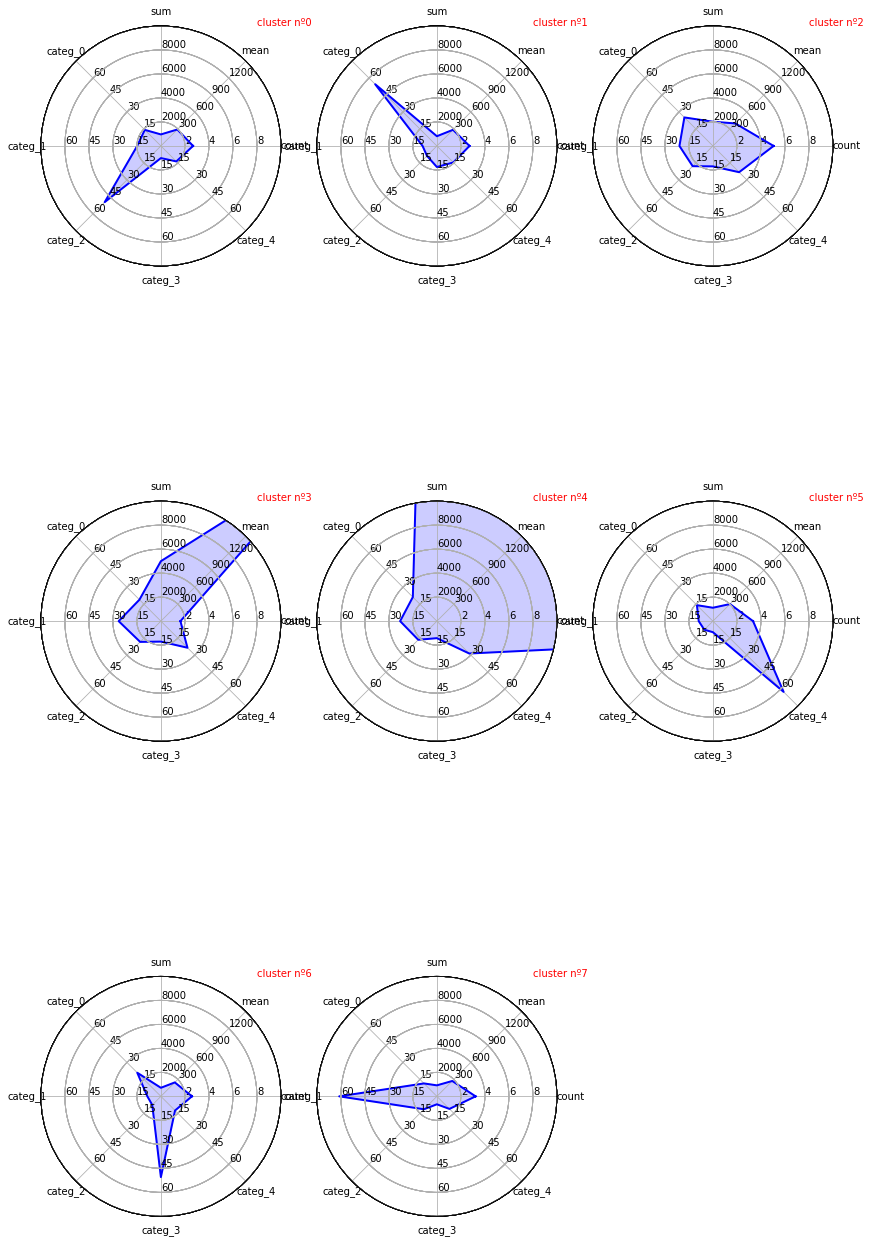

In [ ]:
# display
fig = plt.figure(figsize=(10,12))

attributes = ['count', 'mean', 'sum', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4']
ranges = [[0.01, 10], [0.01, 1500], [0.01, 10000], [0.01, 75], [0.01, 75], [0.01, 75], [0.01, 75], [0.01, 75]]
index  = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

n_groups = n_clusters ; i_cols = 3
i_rows = n_groups//i_cols
size_x, size_y = (1/i_cols), (1/i_rows)

for ind in range(n_clusters):
    ix = ind%3 ; iy = i_rows - ind//3
    pos_x = ix*(size_x + 0.05) ; pos_y = iy*(size_y + 0.05)            
    location = [pos_x, pos_y]  ; sizes = [size_x, size_y] 
    
    #
    data = np.array(merged_df.loc[index[ind], attributes])    
    radar = RadarChart(fig, location, sizes, attributes, ranges)
    radar.plot(data, color = 'b', linewidth=2.0)
    radar.fill(data, alpha = 0.2, color = 'b')
    radar.title(title = 'cluster nº{}'.format(index[ind]), color = 'r')
    ind += 1 

## 4.9) Save data
Save selected_customers data to the file `data_selected_customers.csv`

In [ ]:
selected_customers.to_csv(relative_path + 'data_selected_customers.csv')